In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [38]:
xx_n = 2000
xx_min = 1200.
xx_range = 1000.
xx = (np.random.exponential(scale=0.5, size=xx_n)*xx_range)+xx_min

(array([165., 168., 128., 131., 109., 118.,  98.,  95.,  70.,  81.,  79.,
         64.,  67.,  55.,  54.,  44.,  40.,  38.,  37.,  42.,  35.,  23.,
         27.,  30.,  20.,  12.,  19.,  13.,  10.,  13.,  11.,  10.,   8.,
         11.,   4.,   1.,  10.,   3.,   7.,   3.,   4.,   2.,   1.,   2.,
          1.,   0.,   3.,   2.,   0.,   2.,   2.,   3.,   1.,   2.,   0.,
          3.,   2.,   0.,   1.,   1.,   2.,   0.,   1.,   1.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1200.04471723, 1243.57364188, 1287.10256654, 1330.63149119,
        1374.16041585, 1417.68934051, 1461.21826516, 1504.74718982,
        1548.27611448, 1591.80503913, 1635.33396379, 1678.86288844,
        1722.3918131 , 1765.92073776, 1809.44966241, 1852.97858707,
        1896.50751172, 1940.03643638, 1983.565

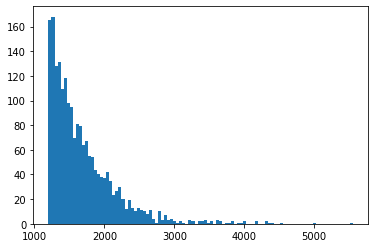

In [39]:
plt.hist(xx,bins=100)

In [40]:
trans_layer = tf.keras.layers.Lambda(lambda x: tf.math.log(x-xx_min))

In [41]:
xx_trans = trans_layer(xx)

(array([0.00435279, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00870558,
        0.        , 0.        , 0.        , 0.        , 0.00435279,
        0.        , 0.        , 0.00435279, 0.00435279, 0.        ,
        0.        , 0.        , 0.01741116, 0.00435279, 0.        ,
        0.        , 0.00435279, 0.01305837, 0.00435279, 0.00435279,
        0.00435279, 0.00435279, 0.03482231, 0.00870558, 0.01305837,
        0.01305837, 0.01305837, 0.00870558, 0.01741116, 0.01305839,
        0.02611673, 0.02176395, 0.0391751 , 0.04352789, 0.04788068,
        0.02611673, 0.06529184, 0.10011415, 0.08270299, 0.06529184,
        0.11317252, 0.11317252, 0.10881995, 0.13928896, 0.13928954,
        0.11752506, 0.12623114, 0.16540633, 0.14799452, 0.18717032,
        0.23069734, 0.26987348, 0.25246124, 0.24

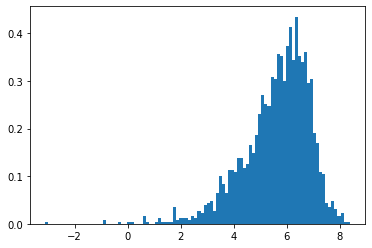

In [42]:
plt.hist(xx_trans.numpy(),bins=100,density=True)

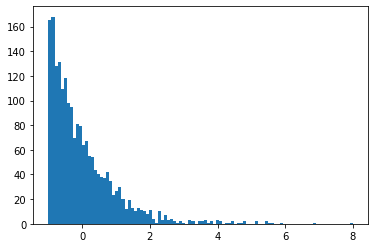

In [43]:
_ = plt.hist((xx - np.mean(xx)) / np.std(xx),bins=100)

In [176]:
#xx_e = (np.random.exponential(scale=0.5, size=xx_n)*xx_range)+xx_min
xx = np.linspace(-1,1,10)

In [177]:
type(xx)

numpy.ndarray

In [178]:
std_layer = tf.keras.layers.Lambda(lambda x: (x - np.mean(x)) / np.std(x))
xx = tf.convert_to_tensor(std_layer(xx),dtype=tf.float32)

In [179]:
xx

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-1.566699  , -1.2185438 , -0.8703884 , -0.522233  , -0.17407767,
        0.17407767,  0.522233  ,  0.8703884 ,  1.2185438 ,  1.566699  ],
      dtype=float32)>

In [180]:
# test 2nd derivative fun
class scnd_deriv_metric_indep():

    def __init__(self, delta=1e-1, name='scndDerivLossIndep'):
        self.name=name
        self.delta = tf.cast(tf.constant(delta),tf.float32) # delta to approximate second derivative

    # @tf.function
    def __call__(self, predictions, pred_delta_plus, pred_delta_minus):
        
        # 2nd finite diff
        fini_diff2 = tf.math.divide_no_nan((pred_delta_plus - tf.cast(tf.constant(2.0),tf.float32)*predictions + pred_delta_minus),tf.math.square(self.delta))  

        return tf.reduce_mean(tf.math.square(fini_diff2)) # mean per batch (-> independent of batch-size)

In [183]:
delta = 1e-2
sin_smooth = lambda x : tf.math.square(x)+0.1*tf.math.sin(5*x)+x
sin_bump = lambda x : tf.math.square(x)+0.3*tf.math.sin(25*x)+x

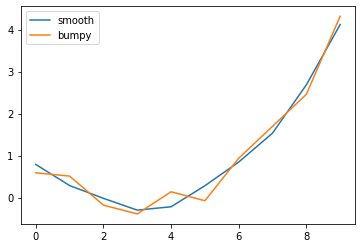

In [184]:
fig = plt.figure()
plt.plot(sin_smooth(xx),label='smooth')
plt.plot(sin_bump(xx),label='bumpy')
plt.legend()

In [185]:
metric_fun = plmo.scnd_fini_diff_metric()

In [186]:
metric_fun(sin_smooth(xx),sin_smooth(xx+delta),sin_smooth(xx-delta))

<tf.Tensor: shape=(), dtype=float32, numpy=7.438141>

In [187]:
metric_fun(sin_bump(xx),sin_bump(xx+delta),sin_bump(xx-delta))

<tf.Tensor: shape=(), dtype=float32, numpy=19506.418>

In [8]:
# smooth sine
xx = np.linspace(0,10,100)
noise = np.random.normal(1,1,100)
y = np.sin(xx)
yyy = np.sin(xx)*noise
noise = np.random.normal(1,0.3,100)
yy = np.sin(xx)*noise

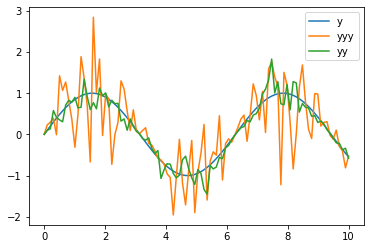

In [9]:
plt.plot(xx,y, label='y')
plt.plot(xx,yyy, label='yyy')
plt.plot(xx,yy, label='yy')
plt.legend()

In [113]:
ff = lambda xx,std: ((xx+2)**1.5)*np.random.normal(1,std,len(xx))

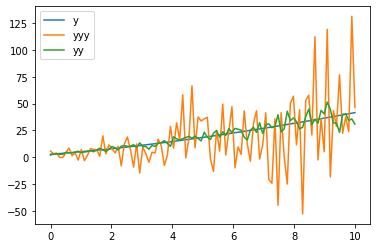

In [114]:
plt.figure()
plt.plot(xx,ff(xx,0), label='y')
plt.plot(xx,ff(xx,1), label='yyy')
plt.plot(xx,ff(xx,0.2), label='yy')
plt.legend()

In [115]:
class scnd_fini_diff_metric():

    def __init__(self, ff, delta=0.1, name='2ndDiff'):
        self.ff = ff
        self.name=name
        self.delta = tf.constant(delta) # delta to approximate second derivative, applied before normalization -> to O(1K)

    # @tf.function
    def __call__(self, inputs, std): # for integration in regular TF -> compute predictions for delta-shifted inputs in outside train/test step
        # import ipdb; ipdb.set_trace()
        pred = ff(inputs,std)
        pred_delta_plus = ff(inputs+self.delta,std) # targets input not used in prediction
        pred_delta_minus = ff(inputs-self.delta,std)
        
        # 2nd finite diff
        fini_diff2 = tf.math.divide_no_nan((pred_delta_plus - tf.cast(tf.constant(2.0),tf.float32)*pred + pred_delta_minus),tf.math.square(self.delta)) # using scaled delta here  

        return tf.reduce_mean(tf.math.square(fini_diff2)).numpy() # mean per batch

In [116]:
metric = scnd_fini_diff_metric(ff=ff)

In [117]:
metric(xx,0)

0.10143992

In [118]:
metric(xx,1)

27864766.0

In [128]:
n = 1000
std = np.linspace(0,0.001,n)
jj = np.asarray([metric(xx,s) for s in std])

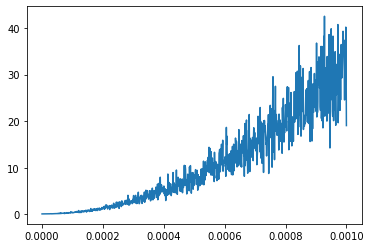

In [129]:
plt.plot(std,jj)

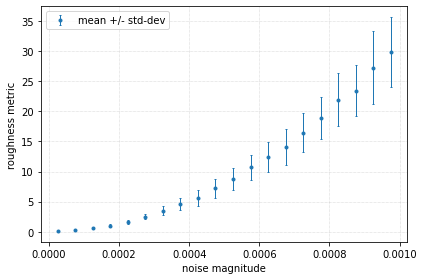

In [135]:
import scipy
x = np.array(std)
y = np.array(jj)
means_result = scipy.stats.binned_statistic(x, [y, y**2], bins=20, range=(x[0],x[-1]), statistic='mean')
means, means2 = means_result.statistic
standard_deviations = np.sqrt(means2 - means**2)
bin_edges = means_result.bin_edges
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

fig = plt.figure()
plt.grid(True, linestyle='dotted',linewidth=0.5)
plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, elinewidth=1., linestyle='none', marker='.', capsize=1, label='mean +/- std-dev')
plt.xlabel('noise magnitude')
plt.ylabel('roughness metric')
plt.legend(loc='best')
plt.tight_layout()
fig.savefig('../fig/qr_theory_analysis/roughness_functional.png')